In [ ]:
# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/5-1/ESAA/data/dacon_article.zip'

Archive:  /content/drive/MyDrive/5-1/ESAA/data/dacon_article.zip
  inflating: article_info.csv        
  inflating: sample_submission.csv   
  inflating: view_log.csv            


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
article_info = pd.read_csv('/content/article_info.csv')
view_log = pd.read_csv('/content/view_log.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
!pip install pandas scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357246 sha256=ae1f4ff8b6f52c515fafb9a962e46261c6b6fbd51341cdca473b5f3b8e8f681a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
!pip install pandas numpy torch scikit-learn

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# translate
https://luis-alberto-g-efe.medium.com/translation-in-python-the-sustainable-way-using-deep-translator-library-b8dab9be25cf

In [ ]:
# Calculate the number of characters in each article
article_info['content_length'] = article_info['Content'].apply(len)

article_info['content_length'].describe()

count      3008.000000
mean       5428.732380
std        6219.370202
min         301.000000
25%        1910.500000
50%        3713.000000
75%        6738.250000
max      122568.000000
Name: content_length, dtype: float64

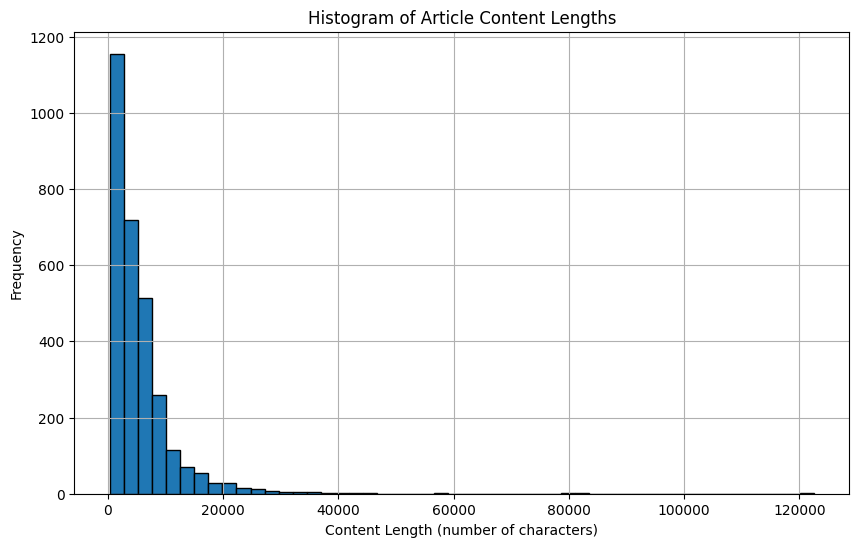

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(article_info['content_length'], bins=50, edgecolor='black')
plt.title('Histogram of Article Content Lengths')
plt.xlabel('Content Length (number of characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import time
from deep_translator import GoogleTranslator
from tqdm import tqdm

# Initialize the translator
translator = GoogleTranslator()

# Function to translate text to English in chunks
def translate(text, src_lang, dest_lang='en'):
    time.sleep(0.1)  # Sleep to avoid hitting rate limits
    try:
        if src_lang == 'en':
            return text

        # Handle different text lengths
        if len(text) <= 1000:
            text_to_translate = text
        elif len(text) <= 2000:
            text_to_translate = text[:1000]
        elif len(text) <= 3000:
            part1 = text[:1000]
            part2 = text[1000:2000]
            translated_part1 = translator.translate(part1, source=src_lang, target=dest_lang)
            translated_part2 = translator.translate(part2, source=src_lang, target=dest_lang)
            return translated_part1 + " " + translated_part2

        # If the text length is more than 3000, truncate to the first 3000 characters and translate in chunks
        else:
            part1 = text[:1000]
            part2 = text[1000:2000]
            part3 = text[2000:3000]
            translated_part1 = translator.translate(part1, source=src_lang, target=dest_lang)
            translated_part2 = translator.translate(part2, source=src_lang, target=dest_lang)
            translated_part3 = translator.translate(part3, source=src_lang, target=dest_lang)
            return translated_part1 + " " + translated_part2 + " " + translated_part3

        translation = translator.translate(text_to_translate, source=src_lang, target=dest_lang)
        return translation
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

# Initialize the progress bar
tqdm.pandas()

# Translate the content of articles in non-English languages with a progress bar
article_info['translated_content'] = article_info.progress_apply(
    lambda row: translate(row['Content'], row['Language']), axis=1)

 76%|███████▌  | 2273/3008 [1:34:43<2:09:12, 10.55s/it]

In [ ]:
import pandas as pd
import time
from deep_translator import GoogleTranslator
from tqdm import tqdm

# Initialize the translator
translator = GoogleTranslator()

# Function to translate text to English in chunks
def translate(text, src_lang, dest_lang='en'):
    time.sleep(0.1)  # Sleep to avoid hitting rate limits
    try:
        if src_lang == 'en':
            return text
        else:
          # Handle different text lengths
          if len(text) <= 1000:
              text_to_translate = text
          elif len(text) <= 2000:
              text_to_translate = text[:1000]
          elif len(text) <= 3000:
              part1 = text[:1000]
              part2 = text[1000:2000]
              translated_part1 = translator.translate(part1, source=src_lang, target=dest_lang)
              translated_part2 = translator.translate(part2, source=src_lang, target=dest_lang)
              return translated_part1 + " " + translated_part2

          # If the text length is more than 3000, truncate to the first 3000 characters and translate in chunks
          else:
              part1 = text[:1000]
              part2 = text[1000:2000]
              part3 = text[2000:3000]
              translated_part1 = translator.translate(part1, source=src_lang, target=dest_lang)
              translated_part2 = translator.translate(part2, source=src_lang, target=dest_lang)
              translated_part3 = translator.translate(part3, source=src_lang, target=dest_lang)
              return translated_part1 + " " + translated_part2 + " " + translated_part3

          translation = translator.translate(text_to_translate, source=src_lang, target=dest_lang)
          return translation
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

# Initialize the progress bar
tqdm.pandas()

# Translate the content of articles in non-English languages with a progress bar
article_info['translated_content'] = article_info.progress_apply(
    lambda row: translate(row['Content'], row['Language']), axis=1)

 16%|█▌        | 469/3008 [20:37<14:24,  2.94it/s]

In [ ]:
# translate Title
def translate(text, src_lang, dest_lang='en'):
    time.sleep(0.1)  # Sleep to avoid hitting rate limits
    try:
        if src_lang == 'en':
            return text
        text_to_translate = text
        translation = translator.translate(text_to_translate, source=src_lang, target=dest_lang)
        return translation
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

# Initialize the progress bar
tqdm.pandas()

# Translate the content of articles in non-English languages with a progress bar
article_info['translated_title'] = article_info.progress_apply(
    lambda row: translate2(row['Title'], row['Language']), axis=1)

In [ ]:
# Create the combined column based on the condition
def combine_content(row):
    if row['Language'] != 'en':
        return row['translated_title'] + " " + row['translated_content']
    else:
        return row['Title'] + " " + row['Content']

article_info['combined'] = article_info.apply(combine_content, axis=1)
# Save the recommendations to a CSV file
article_info.to_csv('article_info_translated_combined.csv', index=False)
print("translated article info saved.csv")

In [ ]:
# Function to translate text last 1000 characters
def translate2(text, src_lang, dest_lang='en'):
    time.sleep(0.1)  # Sleep to avoid hitting rate limits
    try:
        if src_lang == 'en':
            return text
        # Extract the last 1000 characters
        text_to_translate = text[-1000:]
        translation = translator.translate(text_to_translate, source=src_lang, target=dest_lang)
        return translation
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

# Initialize the progress bar
tqdm.pandas()

# Translate the content of articles in non-English languages with a progress bar
article_info['translated_content2'] = article_info.progress_apply(
    lambda row: translate2(row['Content'], row['Language']), axis=1)


100%|██████████| 3008/3008 [57:58<00:00,  1.16s/it]


preprocess text

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Import necessary libraries
from nltk.corpus import stopwords
import re
import string
import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import words
from nltk.tokenize import word_tokenize

# Ensure you have the necessary NLTK data
nltk.download('words')
nltk.download('punkt')

# Load the dictionary of valid words
valid_words = set(words.words())

# Get the list of English and Spanish stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess English, Spanish, and Japanese text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    # remove HTML tag
    text = re.sub(r'<.*?>', ' ', text)
    # 구두점 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # split into words
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() in valid_words]

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in filtered_tokens if not w in stop_words]
    # removing leftover punctuations
    words = [word for word in words if word.isalpha()]

    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply preprocessing to article titles and content
article_info['preprocessed'] = article_info['combined'].apply(preprocess_text)

In [ ]:
# Find the index of articles that have language == 'jp'
ja_articles_indices = article_info[article_info['Language'] == 'ja'].index.tolist()

print(ja_articles_indices)

[1388, 2438]


In [ ]:
print(article_info.loc[1388, 'Title'])
print(article_info.loc[1388, 'Content'])
article_info.loc[1388, 'combined']

The Algorithm March, Japan's Strangely Entertaining Exercise
Arugorizumu Koushin! アルゴリズムこうしん (Algorithm March!) Hitori de koushin ひとりでこうしん (Individual March) Ippo susunde mae narae いっぽすすんでまえならえ (Take one step and reach forward) Ippo susunde eraihito いっぽすすんでえらいひと (Take one step forward and you're a great person) Hikkuri kaete pekorinko ひっくりかえてぺこりんこ (Turn around and bow to the person) Yoko ni aruite kyorokyoro よこにあるいてきょろきょろ (Walk sideways and look around) Chotto kokorade hiraoyogi ちょっとここらでひらおよぎ (Wait here and do the breaststroke) Chotto shagande kurihiroi ちょっとしゃがんでくりひろい (Crouch here a moment and pick up a chestnut) Kuuki iremasu shuu shuu くうきいれますシュウシュウ (Put air in it whoosh, whoosh) Kuuki ga haite pyuu pyuu くうきがはいてピュウピュウ (There's air inside pyuu, pyuu) Ippo susunde mae narae いっぽすすんでまえならえ (Take one step and reach forward) Ippo susunde eraihito いっぽすすんでえらいひと (Take one step forward and you're a great person) Hikkuri kaete pekorinko ひっくりかえてぺこりんこ (Turn around and bow to the person) Yoko ni aru

"The Algorithm March, Japan's Strangely Entertaining Exercise Algorithm March! Individual March Take one step and reach forward Take one step forward and you're a great person Turn around and bow to the person Walk sideways and look around Wait here and do the breaststroke Crouch here a moment and pick up a chestnut Put air in it whoosh, whoosh There's air inside pyuu, pyuu Take one step and reach forward Take one step forward and you're a great person Turn around and bow to the person Walk sideways and look around (Round and round, round and round) Guru guru (Round and round) Guruguruguru guruguruguru (Round and round, round and round) Guru guru (Round and round) Pacchin pacchin gasshin gasshin (slap, slap, bash, bash) Pacchin pacchin gasshin gasshin (slap, slap, bash, bash) Pacchin pacchin gasshin gasshin (slap, slap, bash, bash) Pacchin pacchin gasshin gasshin (slap, slap, bash, bash) Take a deep breath Sutte haku no ga shinkokyuu (Take a deep breath) I definitely like the Algorithm

In [ ]:
article_info.loc[1388, 'preprocessed']

'The Algorithm March Japan Strangely Entertaining Exercise Algorithm March Individual March Take one step reach forward Take one step forward great person Turn around bow person Walk sideways look around Wait breaststroke Crouch moment pick chestnut Put air whoosh whoosh There air inside pyuu pyuu Take one step reach forward Take one step forward great person Turn around bow person Walk sideways look around Round round round round Guru guru Round round Guruguruguru guruguruguru Round round round round Guru guru Round round Pacchin pacchin gasshin gasshin slap slap bash bash Pacchin pacchin gasshin gasshin slap slap bash bash Pacchin pacchin gasshin gasshin slap slap bash bash Pacchin pacchin gasshin gasshin slap slap bash bash Take deep breath Sutte haku ga shinkokyuu Take deep breath I definitely like Algorithm March better Algorithm Taiso Not ninjas much fun group friends Which one like better They heaps fun though Why give try Warning THE ALGORITHM MARCH ALGORITHM TAISO CAN BE VERY 

# hybrid (0.29582)

In [ ]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Collaborative Filtering with SVD
view_log['rating'] = 1  # Implicit rating for viewed articles
reader = Reader(rating_scale=(1, 1))
data = Dataset.load_from_df(view_log[['userID', 'articleID', 'rating']], reader)
trainset = data.build_full_trainset()
svd_model = SVD()
svd_model.fit(trainset)

# Content-Based Filtering with TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(article_info['combined'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Map articleID to index
article_index = pd.Series(article_info.index, index=article_info['articleID'])

# Function to get content-based recommendations
def get_content_based_recommendations(article_id, top_n=5):
    if article_id not in article_index:
        return []
    idx = article_index[article_id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    similar_articles = [article_info['articleID'].iloc[i[0]] for i in sim_scores]
    return similar_articles

# Hybrid Recommendations
user_recommendations = {}
all_articles = article_info['articleID'].values

for user in view_log['userID'].unique():
    # Collaborative filtering recommendations
    cf_predictions = [svd_model.predict(user, article).est for article in all_articles]
    cf_recommendations = [x for _, x in sorted(zip(cf_predictions, all_articles), reverse=True)][:10]

    # Content-based recommendations
    cb_recommendations = []
    viewed_articles = view_log[view_log['userID'] == user]['articleID'].unique()
    for article in viewed_articles:
        cb_recommendations.extend(get_content_based_recommendations(article))
    cb_recommendations = list(set(cb_recommendations))

    # Combine, including articles the user has already seen
    combined_recommendations = list(viewed_articles) + cf_recommendations + cb_recommendations
    hybrid_recommendations = list(dict.fromkeys(combined_recommendations))[:5]  # Ensure uniqueness and limit to top 5

    # Store the recommendations
    user_recommendations[user] = hybrid_recommendations

# Convert user recommendations to a DataFrame
hybrid_recommendations_df = pd.DataFrame([
    {'userID': user, 'articleID': article}
    for user, articles in user_recommendations.items()
    for article in articles
])

# Ensure the DataFrame matches the format of the sample submission
final_recommendations_df = hybrid_recommendations_df[['userID', 'articleID']]

# Save the recommendations to a CSV file
final_recommendations_df.to_csv('hybrid_recommendations.csv', index=False)

print("Hybrid recommendations have been saved to hybrid_recommendations.csv")


Hybrid recommendations have been saved to hybrid_recommendations.csv


0.2958234831

# content + user (0.30161)

In [ ]:
# Import necessary libraries
from nltk.corpus import stopwords
import re
import string
import pandas as pd

# Get the list of English and Spanish stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess English, Spanish, and Japanese text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    # remove HTML tag
    text = re.sub(r'<.*?>', ' ', text)
    # 구두점 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # split into words
    words = nltk.word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # removing leftover punctuations
    words = [word for word in words if word.isalpha()]

    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply preprocessing to article titles and content
article_info['preprocessed'] = article_info['combined'].apply(preprocess_text)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Content-Based Filtering with TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(article_info['preprocessed'])
cosine_sim_articles = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Map articleID to index
article_index = pd.Series(article_info.index, index=article_info['articleID'])

# Function to get content-based recommendations
def get_content_based_recommendations(article_id, top_n=5):
    if article_id not in article_index:
        return []
    idx = article_index[article_id]
    sim_scores = list(enumerate(cosine_sim_articles[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Skip the first one as it is the article itself
    similar_articles = [article_info['articleID'].iloc[i[0]] for i in sim_scores]
    return similar_articles

# Calculate User Similarity Matrix
# Aggregate interactions to handle duplicates
view_log['rating'] = 1  # Implicit rating for viewed articles
view_log_aggregated = view_log.groupby(['userID', 'articleID']).size().reset_index(name='rating')
user_article_matrix = view_log_aggregated.pivot(index='userID', columns='articleID', values='rating').fillna(0)
user_similarity_matrix = cosine_similarity(user_article_matrix)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_article_matrix.index, columns=user_article_matrix.index)

# Hybrid Recommendations
user_recommendations = {}
all_articles = article_info['articleID'].values

for user in view_log['userID'].unique():
    # User-based recommendations
    similar_users = user_similarity_df[user].sort_values(ascending=False).index[1:6]  # Top 5 similar users
    user_based_recommendations = view_log[view_log['userID'].isin(similar_users)]['articleID'].unique()

    # Content-based recommendations
    cb_recommendations = []
    viewed_articles = view_log[view_log['userID'] == user]['articleID'].unique()
    for article in viewed_articles:
        cb_recommendations.extend(get_content_based_recommendations(article))
    cb_recommendations = list(set(cb_recommendations))

    # Combine, including articles the user has already seen
    combined_recommendations = list(viewed_articles) + list(user_based_recommendations) + cb_recommendations
    hybrid_recommendations = list(dict.fromkeys(combined_recommendations))[:5]  # Ensure uniqueness and limit to top 5

    # Store the recommendations
    user_recommendations[user] = hybrid_recommendations

# Convert user recommendations to a DataFrame
hybrid_recommendations_df = pd.DataFrame([
    {'userID': user, 'articleID': article}
    for user, articles in user_recommendations.items()
    for article in articles
])

# Ensure the DataFrame matches the format of the sample submission
final_recommendations_df = hybrid_recommendations_df[['userID', 'articleID']]
final_recommendations_df.head()


,userID,articleID
0,USER_0000,ARTICLE_0661
1,USER_0000,ARTICLE_2316
2,USER_0000,ARTICLE_1345
3,USER_0000,ARTICLE_1089
4,USER_0000,ARTICLE_1484


In [ ]:
# Save the recommendations to a CSV file
final_recommendations_df.to_csv('content_user.csv', index=False)

# just content-based (BERT)  (0.29582)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch

# Function to get BERT embeddings
def get_bert_embeddings(text_list):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    embeddings = []
    for text in tqdm(text_list):
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
        embeddings.append(cls_embedding)
    return np.vstack(embeddings)

# Get BERT embeddings for article content
embeddings = get_bert_embeddings(article_info['preprocessed'].tolist())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 3008/3008 [1:11:42<00:00,  1.43s/it]


In [ ]:
bert_cosine_sim_articles = cosine_similarity(embeddings, embeddings)

In [ ]:
# Map articleID to index
article_index = pd.Series(article_info.index, index=article_info['articleID'])

# Function to get content-based recommendations using BERT embeddings
def get_content_based_recommendations(article_id, top_n=5):
    if article_id not in article_index:
        return []
    idx = article_index[article_id]
    sim_scores = list(enumerate(bert_cosine_sim_articles[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Skip the first one as it is the article itself
    similar_articles = [article_info['articleID'].iloc[i[0]] for i in sim_scores]
    return similar_articles

# Personalized Recommendations
user_recommendations = {}
all_articles = article_info['articleID'].values

for user in view_log['userID'].unique():
    # Content-based recommendations
    cb_recommendations = []
    viewed_articles = view_log[view_log['userID'] == user]['articleID'].unique()
    for article in viewed_articles:
        cb_recommendations.extend(get_content_based_recommendations(article))
    cb_recommendations = list(set(cb_recommendations))

    # Combine, including articles the user has already seen
    combined_recommendations = list(viewed_articles) + cb_recommendations
    hybrid_recommendations = list(dict.fromkeys(combined_recommendations))[:5]  # Ensure uniqueness and limit to top 5

    # Store the recommendations
    user_recommendations[user] = hybrid_recommendations

# Convert user recommendations to a DataFrame
hybrid_recommendations_df = pd.DataFrame([
    {'userID': user, 'articleID': article}
    for user, articles in user_recommendations.items()
    for article in articles
])

# Ensure the DataFrame matches the format of the sample submission
final_recommendations_df = hybrid_recommendations_df[['userID', 'articleID']]
final_recommendations_df.head()

,userID,articleID
0,USER_0000,ARTICLE_0661
1,USER_0000,ARTICLE_2316
2,USER_0000,ARTICLE_1345
3,USER_0000,ARTICLE_1089
4,USER_0000,ARTICLE_1484


In [ ]:
# Save the recommendations to a CSV file
final_recommendations_df.to_csv('just_content_bert.csv', index=False)

# BERT + user based (0.30161, same as TFIDF)

In [ ]:
# Calculate User Similarity Matrix
# Aggregate interactions to handle duplicates
view_log['rating'] = 1  # Implicit rating for viewed articles
view_log_aggregated = view_log.groupby(['userID', 'articleID']).size().reset_index(name='rating')
user_article_matrix = view_log_aggregated.pivot(index='userID', columns='articleID', values='rating').fillna(0)
user_similarity_matrix = cosine_similarity(user_article_matrix)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_article_matrix.index, columns=user_article_matrix.index)

# Hybrid Recommendations
user_recommendations = {}
all_articles = article_info['articleID'].values

for user in view_log['userID'].unique():
    # User-based recommendations
    similar_users = user_similarity_df[user].sort_values(ascending=False).index[1:6]  # Top 5 similar users
    user_based_recommendations = view_log[view_log['userID'].isin(similar_users)]['articleID'].unique()

    # Content-based recommendations
    cb_recommendations = []
    viewed_articles = view_log[view_log['userID'] == user]['articleID'].unique()
    for article in viewed_articles:
        cb_recommendations.extend(get_content_based_recommendations(article))
    cb_recommendations = list(set(cb_recommendations))

    # Combine, including articles the user has already seen
    combined_recommendations = list(viewed_articles) + list(user_based_recommendations) + cb_recommendations
    hybrid_recommendations = list(dict.fromkeys(combined_recommendations))[:5]  # Ensure uniqueness and limit to top 5

    # Store the recommendations
    user_recommendations[user] = hybrid_recommendations

# Convert user recommendations to a DataFrame
hybrid_recommendations_df = pd.DataFrame([
    {'userID': user, 'articleID': article}
    for user, articles in user_recommendations.items()
    for article in articles
])

# Ensure the DataFrame matches the format of the sample submission
final_recommendations_df = hybrid_recommendations_df[['userID', 'articleID']]
final_recommendations_df.head()

,userID,articleID
0,USER_0000,ARTICLE_0661
1,USER_0000,ARTICLE_2316
2,USER_0000,ARTICLE_1345
3,USER_0000,ARTICLE_1089
4,USER_0000,ARTICLE_1484


In [ ]:
# Save the recommendations to a CSV file
final_recommendations_df.to_csv('bert_user.csv', index=False)

# latent factor on article content (0.190662)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

# Latent Factor Model using TF-IDF and SVD on article content
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(article_info['Content'])

# Apply TruncatedSVD to create latent factors
svd = TruncatedSVD(n_components=100)
latent_factors = svd.fit_transform(tfidf_matrix)

# Compute cosine similarity between articles based on latent factors
cosine_sim_articles = cosine_similarity(latent_factors, latent_factors)

# Map articleID to index
article_index = pd.Series(article_info.index, index=article_info['articleID'])

# Function to get latent factor-based recommendations
def get_latent_factor_recommendations(article_id, top_n=5):
    if article_id not in article_index:
        return []
    idx = article_index[article_id]
    sim_scores = list(enumerate(cosine_sim_articles[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Skip the first one as it is the article itself
    similar_articles = [article_info['articleID'].iloc[i[0]] for i in sim_scores]
    return similar_articles

# Calculate User Similarity Matrix
view_log['rating'] = 1  # Implicit rating for viewed articles
view_log_aggregated = view_log.groupby(['userID', 'articleID']).size().reset_index(name='rating')
user_article_matrix = view_log_aggregated.pivot(index='userID', columns='articleID', values='rating').fillna(0)
user_similarity_matrix = cosine_similarity(user_article_matrix)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_article_matrix.index, columns=user_article_matrix.index)

# Hybrid Recommendations
user_recommendations = {}
all_articles = article_info['articleID'].values

for user in view_log['userID'].unique():
    # User-based recommendations
    similar_users = user_similarity_df[user].sort_values(ascending=False).index[1:6]  # Top 5 similar users
    user_based_recommendations = view_log[view_log['userID'].isin(similar_users)]['articleID'].unique()

    # Latent factor-based recommendations
    lf_recommendations = []
    viewed_articles = view_log[view_log['userID'] == user]['articleID'].unique()
    for article in viewed_articles:
        lf_recommendations.extend(get_latent_factor_recommendations(article))
    lf_recommendations = list(set(lf_recommendations))

    # Combine, including articles the user has already seen
    combined_recommendations = list(viewed_articles) + list(user_based_recommendations) + lf_recommendations
    hybrid_recommendations = list(dict.fromkeys(combined_recommendations))[:5]  # Ensure uniqueness and limit to top 5

    # Store the recommendations
    user_recommendations[user] = hybrid_recommendations

# Convert user recommendations to a DataFrame
hybrid_recommendations_df = pd.DataFrame([
    {'userID': user, 'articleID': article}
    for user, articles in user_recommendations.items()
    for article in articles
])

# Ensure the DataFrame matches the format of the sample submission
final_recommendations_df = hybrid_recommendations_df[['userID', 'articleID']]

# Save the recommendations to a CSV file
final_recommendations_df.to_csv('latent_user.csv', index=False)

현주 코드

In [ ]:
# tfidf 기반 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
content_mat = tfidf_vect.fit_transform(article_info['combined'])

# 코사인 유사도
from sklearn.metrics.pairwise import cosine_similarity
content_similarity = cosine_similarity(content_mat, content_mat)
#print(content_similarity)

# 기사 ID -> 인덱스 매핑
article_id_to_idx = {article: idx for idx, article in enumerate(article_info['articleID'])}

def recommend_articles(user_id, view_log, article_similarity, article_id_to_idx, top_n=5):
    user_articles = view_log[view_log['userID'] == user_id]['articleID'].tolist()

    # 조회한 기사와 유사한 기사 추출
    sim_scores = pd.Series(dtype=float)
    for article in user_articles:
        if article in article_id_to_idx:
            article_idx = article_id_to_idx[article]
            sim_scores = sim_scores.add(pd.Series(content_similarity[article_idx]), fill_value=0)

    # 조회한 기사는 제외
    # sim_scores = sim_scores.drop([article_id_to_idx[article] for article in user_articles if article in article_id_to_idx], errors='ignore')

    # 유사도 높은 기사 추천
    top_articles = sim_scores.sort_values(ascending=False).head(top_n).index
    top_article_ids = [list(article_id_to_idx.keys())[idx] for idx in top_articles]

    return top_article_ids

# 각 사용자에 대해 추천 기사 생성
recommendations = []
for user_id in sample_submission['userID'].unique():
    recommended_articles = recommend_articles(user_id, view_log, content_similarity, article_id_to_idx, top_n=5)
    for article_id in recommended_articles:
        recommendations.append({'userID': user_id, 'articleID': article_id})

# 추천 결과 저장
content = pd.DataFrame(recommendations)
content.head()

,userID,articleID
0,USER_0000,ARTICLE_2721
1,USER_0000,ARTICLE_0830
2,USER_0000,ARTICLE_1449
3,USER_0000,ARTICLE_1891
4,USER_0000,ARTICLE_2991


In [ ]:
content.to_csv('content.csv', index=False)